# **Cat and Dog Image Project Report**


### **Abstract**

### **Introduction**

The cat-dog image project explores the field of domain specific image classification. This task is preformed quickly and accurately by humans, however remains difficult for computers. The signifigance of this project is to help develop methods of classifying subjects that possess many the ineherent similarites (4 legs, hairy bodies, similar face structure) and exist in similar environments (inside houses, on grass, next to humans). We adopt the tools of manual image feature extraction to classify images in our dataset. Additionally we apply neural networks (CNNs and a pretrained ResNet) to solve the task given their ability to learn which features matter when classifying the images. We preprocess the data, propose several feature extracting techniques (BRISK and HOG) and ML models (KNN, SVM, RF) and compare our results to the NN methods.

### **Background**

### **Data**

Our data gathered here (https://www.microsoft.com/en-us/download/details.aspx?id=54765) consists of 25,000 images balanced evenly between cats and dogs. This Kaggle data is a subset of data gathered for Microsoft Research through Asirra (Animal Species Image Recognition for Restricting Access) that works by asking users to identify photographs of cats and dogs.  

We built our training set out of the first 11,000 images of each catergory (22,000 total).
We built our validation set out of the next 1,000 images of each category (2,000 total).
We built our testing set out of the last 500 images of each category (1,000 total). 

Our preprocessing steps included image resizing to a standard 128x128 pixels and normalizing pixel values.

In the preprocessing step, some empty or small image files we discovered and discarded from the training set, in total 6 each of cats and dogs were removed. 

### **Methods**

Color Images - Images were resized to dimensions of 128x128 pixels and then flattened them, using all features for comprehensive analysis.


![Color Images Cat](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/color_images_cat.png?raw=true)

![Color Images Dog](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/color%20images_dog.png?raw=true)


Pixel Intensity: Pixel intensity refers to the brightness or darkness of a pixel in an image. We added pixel intensity as a feature in our model to evaluate if it improves the results.



Canny Edge Detection - Identifies edges in an image by detecting significant changes in pixel intensity and then tracing the outlines of objects within the image based on these detected changes. And it was to assess its potential to enhance the outcome.

![Edge Canny - Cat](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/canny_edge%20detection.png?raw=true)


![Edge Canny - Dog](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/canny_edge_dog.png?raw=true)



BVOW - (Bag of Visual Words) is a method of image classification that builds a "vocabulary" of BRISK features to classify an image. When used for binary image classification, histograms of features are created to represent each image and a comparison between the classes using a KNN classifier is applied. The output is a predictor that will extract the feature "vocabulary" from the inferenced image and return a class prediction.


These are a histograms of feature frequencies of a cat and a dog image in the validation set. The frequencies are how often they show up in a specific image and the visual word index corresponds to a BRISK feature measured in original image.

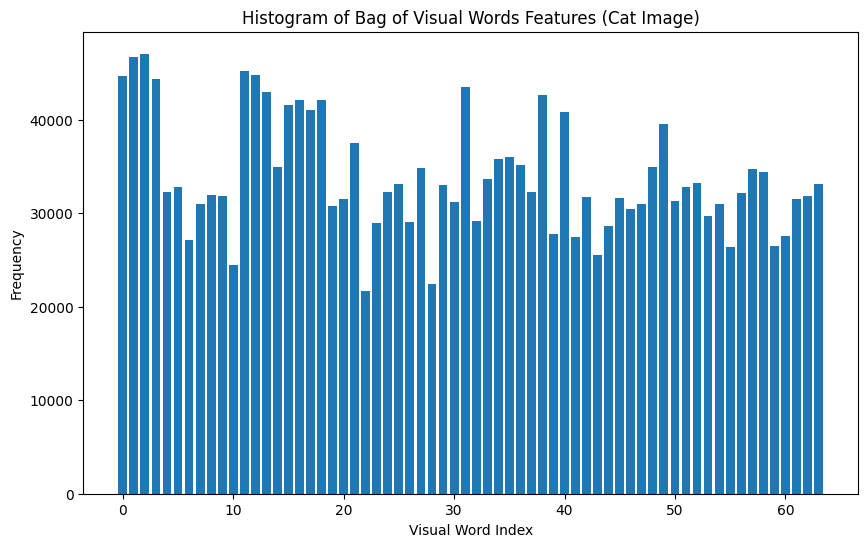
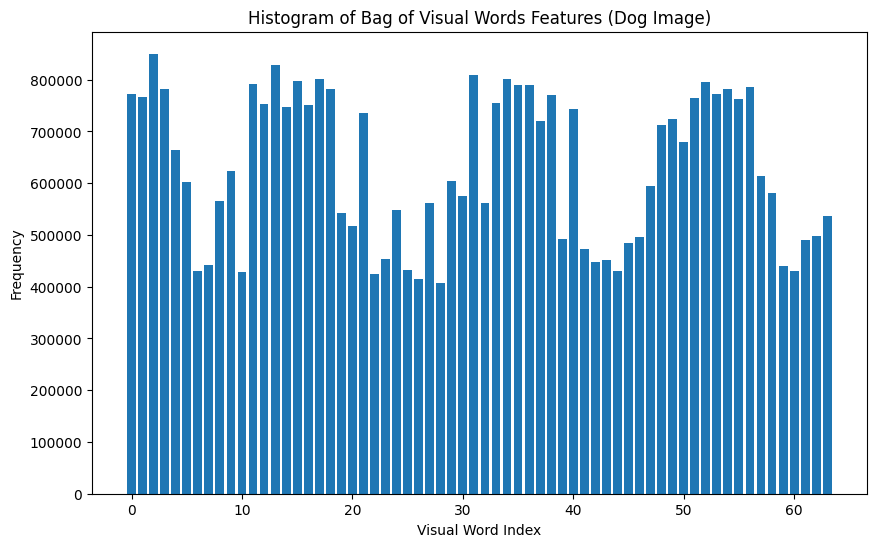

These histograms are grouped using KNN to build a classifier between cat and dog images. 
The resulting accuracy of this BOVW clkassifier was 67.5% and the corresponding confusin matrix shows that this method is a little better at recognizing a cat image vs a dog image.

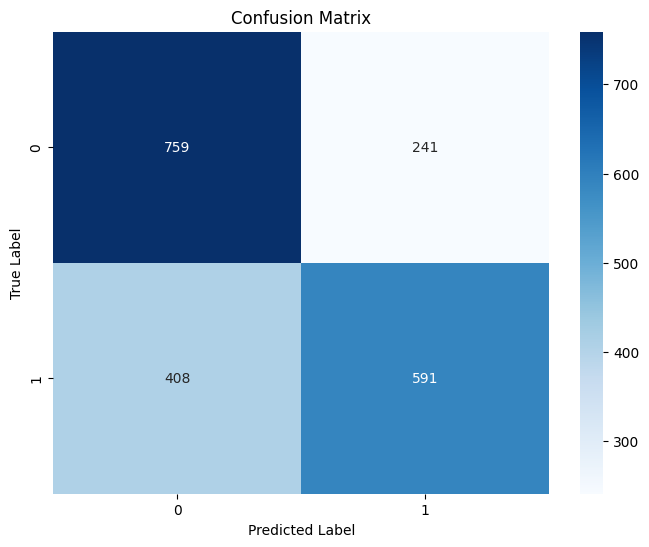

The AUC-ROC is 0.675 and the ROC curve shows it is performing better than a coin flip yet worse than other methods we have developed.

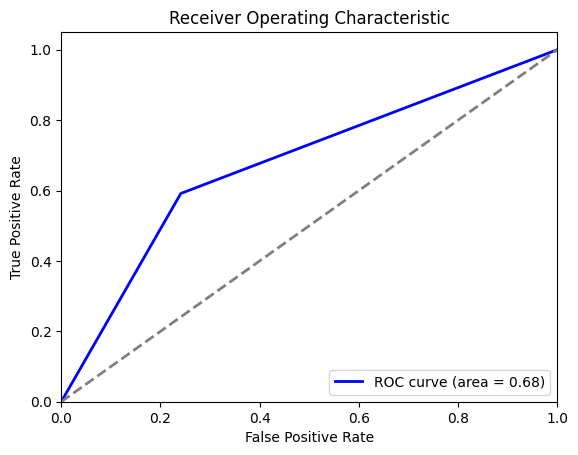

RGB

Using Skimage (scikit-image), in each function all images with dimensions of 128x128 pixels are resized, resorting to image division corresponding to their RGB distribution, in which a color image is taken and divided into three dimensions, one for red colors, another green and blue, where each pixel value can be taken as the color intensity value in that position, and subsequently perform a series of transformations to each channel individually.

![RGB Features](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/RGB.png?raw=true)

Histogram of RGB Channels

A histogram is made of each color channel, which describes the intensity of the color (0 to 255) and the number of pixels that have that intensity; Obtaining a total of 20 bins for each histograms.

![Histogram Features](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/histo.png?raw=true)

The HSV (Hue, Saturation, Value) Hue space extracts color representations measured in degrees where 0° is red, 120° is green, and 240° is blue. Saturation represents the intensity or purity of the color and is measured from 0 to 100%, and value represents the brightness of the color. This characteristic is useful for determining image borders.

![HSV Features](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/hsv.png?raw=true)

LAB

(also known as CIELAB or Lab) separates luminance information (L) from color components (a and b*), luminance is separated from color components, allowing brightness to be manipulated without affecting color and vice versa

![LAB Features](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/lab.png?raw=true)

HOG

(Histogram of Oriented Gradients), used for the detection and recognition of objects in images, describes the edges and shape through the intensity of gradients of a dense region of the image, evaluating the difference between the pixels of each cell and again grouping the cells by blocks and finally the normalized histograms of all the blocks are concatenated to form the final HOG descriptor.

number of horizontal cells = 128/8

number of vertical cells = 128/8

Therefore, the image is divided into a total of 16 x 16 = 256 cells.

number of horizontal blocks=16−2+1=15

number of vertical blocks=16−2+1=15

Therefore, we have a total of 15 x 15 = 225 blocks.

Each block has 2x2 cells, and each cell has 9 bins of orientations:

number of features per block=2×2×9=36

total number of features=225 blocks×36 features per block=8100

![HOG Features](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/hog.png?raw=true)

![Splitting the dataset](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/split.png?raw=true)

StandardScaler is used to standardize features by removing the mean and scaling to unit variance. It is used to ensure that each feature contributes equally to the Euclidean distance in distance-dependent machine learning algorithms such as SVM, k-NN, by calculating the mean and standard deviation of each feature in the training set and then transforming these values so that each characteristic has a mean of 0 and a standard deviation of 1.

PCA (Principal Component Analysis) dimensionality reduction is used to transform the data set, due to having too many dimensions, into a set with fewer dimensions while retaining most of the variability in the original data. PCA allows for model simplification, noise removal, and improved data visualization.

![Best PCA](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/pca.png?raw=true)

Best PCA on different features

![Features PCA](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/pca_features.png?raw=true)

Validation of three classifier

![SVC KNN RF](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/val_class.png?raw=true)

Validation ROC curve with HOG features

![ROC AUC HOG](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/roc_val.png?raw=true)

Validation ensemble methods voting and stacking cls

![Validation Ensemble methods](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/val_ensem.png?raw=true)

Testing Ensemble methods

![Test voting stacking cl](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/test_ensem.png?raw=true)

Testing HOG features with Voting and Stacking classifiers

![ROC AUC test HOG](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/roct_test.png?raw=true)

ResNet50 

To create the most accurate classifier we adapted the pretrained image model ResNet50. Running the base model on our data produced essential coinflip results. With some finetuning on out training set, the ResNet50 model performed the best on our validation and testing sets.

The pretrained model is saved as a pkl file and can be downloaded: https://drive.google.com/file/d/1lc6Y0jCu1w9UaINiOTS52NUdXM9d9vRA/view?usp=drive_link

The following accuracy measurements were as follow
Training Set Accuracy: 99.68%
Validation Set Accuracy 99.35%
Test Set Accuracy: 99.40%

The accompanying ROC Curve and Confusion Matrix also describe a model that can classify cat and dog images with a very high accuracy and true positive rate and very low false positive rate. 

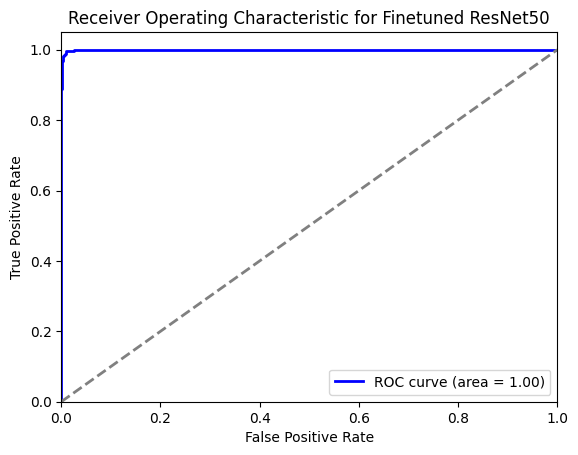

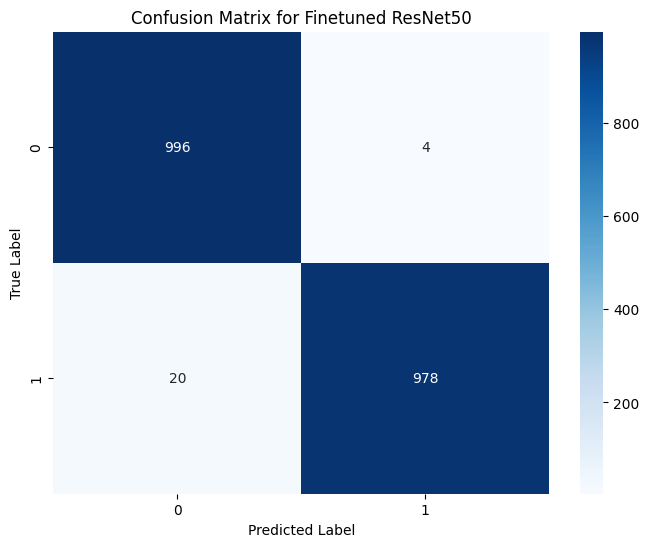

### **Evaluation**

### **Conclusion**